<a href="https://colab.research.google.com/github/Edward1304/Signals-and-systems-Edward/blob/main/Ejercicios_SyS_Notebook_4y5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Edward Fabian Goyeneche Velandia.\
Juan Esteban  Guevara Roncancio \
Juan Sebastian Torres Clavijo

###Ejercicio Notebook 4-5

---------------------------------------------------------------------------------------------------------

### Ejercicio

El siguiente bloque de código permite graficar las primeras 50 muestras de la señal $x[n] = cos[2\pi fn]$ para diferentes valores de $f$. 

Saque sus propias conclusiones de cómo afecta el valor de la frecuencia el periodo de la señal discreta.

#Notebook 4 (Señales periódicas y aperiódicas)

In [1]:
from numpy import exp, pi, arange, real, imag, abs, angle, sqrt, cos
import matplotlib.pyplot as plt
import ipywidgets
def senial(f): 
  
  n = arange(0, 50)
  plt.figure(1, (25, 10))
  x = cos(4*pi*f*n)
  plt.stem(n, x, use_line_collection=True)
  plt.grid()
  plt.margins(x=.01)
  plt.title('Gráfica de la señal $x[n] = cos(2\pi \cdot {} \cdot n)$'.format(f), fontsize=15)
  plt.xlabel('Muestras')
  plt.show()
display(ipywidgets.interactive(senial, f=ipywidgets.FloatText(value=0, step=.1, description='Valor de f:')))

interactive(children=(FloatText(value=0.0, description='Valor de f:', step=0.1), Output()), _dom_classes=('wid…

Tenemos la señal $x[n] = cos[2\pi fn]$, a medida que variamos el valor de f, la imagen mostrada se repite cada 1.0 unidades; es decir que la de f = 0.2 es igual a la de f = 1.2. Por qué?

Tendremos una periodicidad dada por 

$$
cos[2\pi fn] = cos[2\pi (f+F)n]\\
cos[2\pi fn] = cos[2\pi fn]*cos[2\pi Fn] - sen[2\pi fn]*sen[2\pi Fn]\\
$$
Para eso:


$$cos[2\pi Fn] = 1\\sen[2\pi Fn] = 0$$

Entonces 
$$
2\pi Fn = 2\pi k, k \in \mathbf{N}\\
k = Fn \in \mathbf{N}
$$
Entonces la señal cuya frecuencia angular sea igual a $f$, tendrá una señal idéntica dad por la frecuencia angular $f + F$ donde F es un número natural.

-------------------------------------------------------------------------------------------------------------------------

###Notebook 5 (Señales Energia Potencia)

## Ejercicio 1

Graficar la potencia media de una impedancia $R+jwL$, cuándo es excitada por una fuente sinusoidal.

Graficar la potencia media de una impedancia $R-j\frac{1}{wC} $, cuándo es excitada por una fuente sinusoidal.

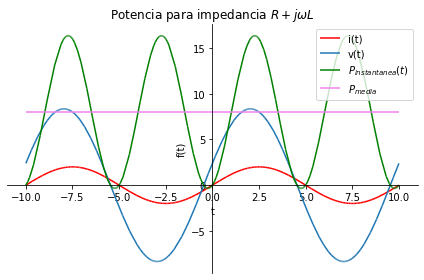

In [ ]:
from sympy import * #importar todo sympy
init_printing()
import warnings
warnings.filterwarnings("ignore")

w = symbols('w', real=True, nonzero=True)
I_max , t, R, L, C, T = symbols('I_max t R L C T', real=True)

i = I_max*sin(w*t)
T0 = 2*pi/w


vl = L*diff(i,t)
vc = -I_max*cos(w*t)/(w*C)
vr = R*i

v = vl + vr
I = i.subs([(I_max,2),(w,0.2*pi)])
V = v.subs([(I_max,2),(w,0.2*pi),(R,4),(L,1.9)])

t0 = T0.subs(w,0.2*pi)

P = V*I
p = integrate(P,(t,0,t0)) / t0

fig = plot(I,show=False,line_color="red",label="i(t)",legend=1,title="Potencia para impedancia $R + j\omega L$")
fig.extend(plot(V,show=False,label="v(t)"))
fig.extend(plot(P,show=False,label="$P_{instantanea}(t)$",line_color="green"))
fig.extend(plot(p,show=False,label="$P_{media}$",line_color="violet"))


fig.show()
integrate(v*i,(t,0,T0))/T0,p

## Ejercicio 2





Dado que el valor RMS de una señal continua en un intervalo $[a,b]$ está dada por:
$$
x_{RMS} = \lim_{n \to \infty} \sqrt{  \frac{1}{n}  \sum_{j=1}^n x(a+j\Delta x)^2}
$$
ya que sabemos que $Δx = \frac{b-a}{n}$, podemos despejar n que sería $n = \frac{b-a}{Δx}$, reemplazando

$$
x_{RMS} = \lim_{n \to \infty} \sqrt{  \frac{1}{b-a}  \sum_{j=1}^n x(a+j\Delta x)^2} \Delta x
$$

Vemos que esta definción es muy similar a la de una integral de una función, con 3 diferencias notables:
* La función a integrar está al cuadrado.
* Estamos dividiendo sobre el intervalo.
* El resultado de la integral está dentro de una raíz.

Sin embargo, la potencia de una señal está dada por:

$$
\bar{P}_x = \lim_{T \to \infty} \frac{1}{T} \int_T |x(t)|^{2}~dt  \tag{9}
$$

Se nota que en ambos la señal es elvadada al cuadrado y es divida sobre el intervalo definido, en el caso de la señal de potencia $[-∞,+\infty]$.


Es decir que el valor de potencia de una señal es el valor RMS elevado al cuadrado y donde el intervalo a calcular es $[-∞,+\infty]$

##Ejercicio 3

Para clasificar la señal $x(t)$ como de energía o de potencia, necesitamos calcular la energía o la potencia media de la señal en un intervalo finito de tiempo.

Primero, calculemos la energía de la señal $x(t)$ en un intervalo de tiempo finito $[-T,T]$, donde $T>0$:

$$E_T = \int_{-T}^{T}|x(t)|^2dt=\int_{-T}^{T}|e^{-\alpha t}t|^2dt=\int_{-T}^{T}e^{-2\alpha t}t^2dt$$

Podemos resolver esta integral por partes, usando $u = t$ y $dv = e^{-2\alpha t}t~dt$:

$$\begin{aligned} E_T & = \int_{-T}^{T}e^{-2\alpha t}t^2dt \ & = \left[-\frac{t}{2\alpha}e^{-2\alpha t} \right]{-T}^{T} - \int{-T}^{T}\left(-\frac{1}{2\alpha}e^{-2\alpha t}\right)dt \ & = \frac{T^2}{\alpha}e^{-2\alpha T} + \frac{1}{2\alpha}\left[e^{-2\alpha t}\right]_{-T}^{T} \ & = \frac{T^2}{\alpha}e^{-2\alpha T} + \frac{1}{\alpha}\left(1-e^{-2\alpha T}\right) \end{aligned}$$

Ahora, tomemos el límite cuando $T \rightarrow \infty$:

$$\lim_{T \rightarrow \infty}E_T=\lim_{T \rightarrow \infty}\left(\frac{T^2}{\alpha}e^{-2\alpha T} + \frac{1}{\alpha}\left(1-e^{-2\alpha T}\right)\right)$$

Usando la regla de L'Hôpital, podemos demostrar que $\lim_{T \rightarrow \infty} \frac{T^2}{e^{2\alpha T}} = 0$. Por lo tanto:

$$\lim_{T \rightarrow \infty}E_T = \frac{1}{\alpha}$$

Si $\lim_{T \rightarrow \infty}E_T$ es finito y distinto de cero, entonces la señal $x(t)$ es de potencia. Si $\lim_{T \rightarrow \infty}E_T$ es cero, entonces la señal $x(t)$ es de energía. En este caso, como $\lim_{T \rightarrow \infty}E_T$ es finito y distinto de cero, la señal $x(t)$ es de potencia.


Por lo tanto, la señal $x(t) = e^{-\alpha t}~t$ es de potencia.

##Ejercicio 4

La distancia entre dos señales $x_1(t)$ y $x_2(t)$ se puede dar en términos de la potencia media de la diferencia entre ellas; es decir, la potencia media del error.

$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt
$$

Sea $x_1(t)$ y $x_2(t$) dos señales periódicas de periodo fundamental $T_0$ como se muestra a continuación.

$$
x_1(t) = \cos(w_0t), ~~~ w_0 = \frac{2\pi}{T_0}\\
x_2(t)= \left\{ \begin{array}{lcc}
             ~~~1 &   si  & 0 \leq t < \frac{T}{4} \\
             \\ -1 &  si &  \frac{T}{4} \leq t < \frac{3T}{4} \\
             \\ ~~~1 &  si  & \frac{3T}{4} \leq t < T
             \end{array}
   \right.
$$

Determine la distancia entre las dos señales:\
$$
d(x_1, x_2) = \bar{P}_{x_1-x_2}=\lim_{T \to \infty} \frac{1}{T} \int_T |x_1(t)-x_2(t)|^{2}~dt\\
d(x_1, x_2) = \frac{1}{T_0} \int_{0}^{T_0} |x_1(t)-x_2(t)|^{2}~dt\\
= \frac{1}{T_0} \left[ \int_{0}^{\frac{T_0}{4}} |cos(\omega_{0}t)-1|^{2}~dt + 
    \int_{\frac{T_0}{4}}^{\frac{3T_0}{4}} |cos(\omega_{0}t)+1|^{2}~dt
    \int_{\frac{3T_0}{4}}^{T_0} |cos(\omega_{0}t)-1|^{2}~dt
 \right] \\
= \frac{1}{T_0} \left[ 
    \int_{0}^{\frac{T_0}{4}} |cos(\omega_{0}t)-1|^{2}~dt + 
    \int_{\frac{T_0}{4}}^{\frac{3T_0}{4}} |cos(\omega_{0}t)+1|^{2}~dt
    \int_{\frac{3T_0}{4}}^{T_0} |cos(\omega_{0}t)-1|^{2}~dt
 \right] \\
 = \frac{1}{T_0} \left[ 
    \frac{6 \omega_0 t-8sen(\omega_0t)+sin(2 \omega_0 t)}{4\omega_0}\bigg|_{0}^{\frac{T_0}{4}} + 
    \frac{6 \omega_0 t+8sen(\omega_0t)+sin(2 \omega_0 t)}{4\omega_0}\bigg|_{\frac{T_0}{4}}^{\frac{3T_0}{4}}
    \frac{6 \omega_0 t-8sen(\omega_0t)+sin(2 \omega_0 t)}{4\omega_0}\bigg|_{\frac{3T_0}{4}}^{T_0}
 \right] \\
= \frac{1}{T_0} \left[ 
    \frac{6 \omega_0 t-8sen(\omega_0t)+sin(2 \omega_0 t)}{4\omega_0}\bigg|_{0}^{\frac{T_0}{4}} + 
    \frac{6 \omega_0 t+8sen(\omega_0t)+sin(2 \omega_0 t)}{4\omega_0}\bigg|_{\frac{T_0}{4}}^{\frac{3T_0}{4}}
    \frac{6 \omega_0 t-8sen(\omega_0t)+sin(2 \omega_0 t)}{4\omega_0}\bigg|_{\frac{3T_0}{4}}^{T_0}
 \right] \\
$$

In [ ]:
T0 = symbols('T0',real=True,nonzero=True)
w0 = 2*pi/T0
x1 = cos(w0*t)

(integrate((cos(w0*t)-1)**2,(t,0,T0/4)) + integrate((cos(w0*t)+1)**2,(t,T0/4,3*T0/4)) + integrate((cos(w0*t)-1)**2,(t,3*T0/4,T0)))/T0

###Ejercicio 5


Primero Definimos la norma.\
La norma de una señal $x(t)$ se define como:

$$\lVert x \rVert^2 = \int_{-\infty}^{\infty} \lvert x(t) \rvert^2 dt$$

Secuentemente definimo la energía de una señal:

$$E_x = \int_{-\infty}^{\infty} \lvert x(t) \rvert^2 dt$$

Para demostrar que la norma al cuadrado de una señal es igual a su energía, simplemente necesitamos demostrar que:

$$\lVert x \rVert^2 = E_x$$

Para hacer esto, podemos usar la definición de la energía de una señal para obtener:

$$E_x = \int_{-\infty}^{\infty} \lvert x(t) \rvert^2 dt$$

Luego, podemos utilizar [la identidad de Parseval](https://es.wikipedia.org/wiki/Identidad_de_Parseval), que establece que la energía de una señal es igual a la norma al cuadrado de su transformada de Fourier:

$$E_x = \int_{-\infty}^{\infty} \lvert x(t) \rvert^2 dt = \int_{-\infty}^{\infty} \lvert F(x)(\omega) \rvert^2 d\omega = \lVert F(x) \rVert^2$$

Donde $\mathcal{F}(x)$ es la transformada de Fourier de la señal $x(t)$.

Para llegar finalmente  lo que  necesiramos es usar una propiedad de  Fourier para obtener:

$$\lVert x \rVert^2 = \lVert F(x) \rVert^2 = \int_{-\infty}^{\infty} \lvert x(t) \rvert^2 dt = E_x$$

Lo que demuestra que la norma al cuadrado de una señal es igual a su energía.

Un ejemplo  para esto:\
Para una representacion , tebemos una señal $x(t) = \cos(t)$ en el intervalo $[-\pi,\pi]$.\
Primero, podemos calcular la energía de la señal utilizando la fórmula que deducimos :

$$ E_x = \int_{-\infty}^{\infty} |x(t)|^2 dt $$

Sin embargo, como la señal es periódica, podemos calcular la energía en un solo período y multiplicar por la duración del período para obtener la energía total:

$$ E_x = \frac{1}{2\pi} \int_{-\pi}^{\pi} |\cos(t)|^2 dt = \frac{1}{2\pi} \int_{-\pi}^{\pi} \cos^2(t) dt $$

Usando la identidad trigonométrica $\cos^2(t) = \frac{1}{2}(1 + \cos(2t))$, podemos reescribir la integral como:

$$ E_x = \frac{1}{2\pi} \int_{-\pi}^{\pi} \frac{1}{2}(1 + \cos(2t)) dt = \frac{1}{2} $$

Por lo tanto, la energía de la señal es $\frac{1}{2}$.

A continuación, podemos calcular la norma al cuadrado de la señal utilizando la fórmula:

$$ ||x||^2 = \int_{-\infty}^{\infty} |x(t)|^2 dt $$

Nuevamente, como la señal es periódica, podemos calcular la norma al cuadrado en un solo período y multiplicar por la duración del período para obtener la norma al cuadrado total:

$$ ||x||^2 = \frac{1}{2\pi} \int_{-\pi}^{\pi} |\cos(t)|^2 dt = \frac{1}{2\pi} \int_{-\pi}^{\pi} \cos^2(t) dt $$

Usando la misma identidad trigonométrica que antes, podemos reescribir la integral como:

$$ ||x||^2 = \frac{1}{2\pi} \int_{-\pi}^{\pi} \frac{1}{2}(1 + \cos(2t)) dt = \frac{1}{2} $$

Por lo tanto, la norma al cuadrado de la señal también es $\frac{1}{2}$, lo que demuestra que la norma al cuadrado de una señal es igual a su energía.



Norma al cuadrado de la señal: 117.60652537033779
Energía de la señal: 117.60652537033779


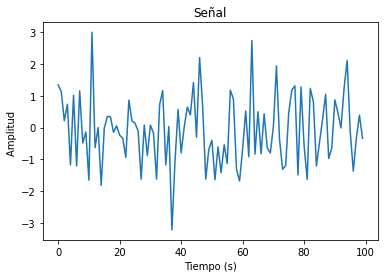

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# llamamos una  señal aleatorio para
# comprobar
x = np.random.randn(100)

# Calculamos la norma al cuadrado
norm_squared = np.sum(np.abs(x)**2)

# Calculamos la energía de la señal
energy = np.sum(x**2)


print("Norma al cuadrado de la señal:", norm_squared)
print("Energía de la señal:", energy)


plt.plot(x)
plt.title('Señal')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud ')
plt.show()